# Project A — Descriptive mining scenario and dataset

## Association mining to find common items purchased based on online retail data
A European online retail store has recorded the purchase history of its customers. The online retail data D1.csv consists of 19,663 observations where each observation presents an item purchased in the invoice. The data also contains other attributes such as quantity and unit price. There is a total of 10156 unique purchases (invoices) and 13 unique items purchased. The following table details the attributes in the dataset ‘D1.csv’.

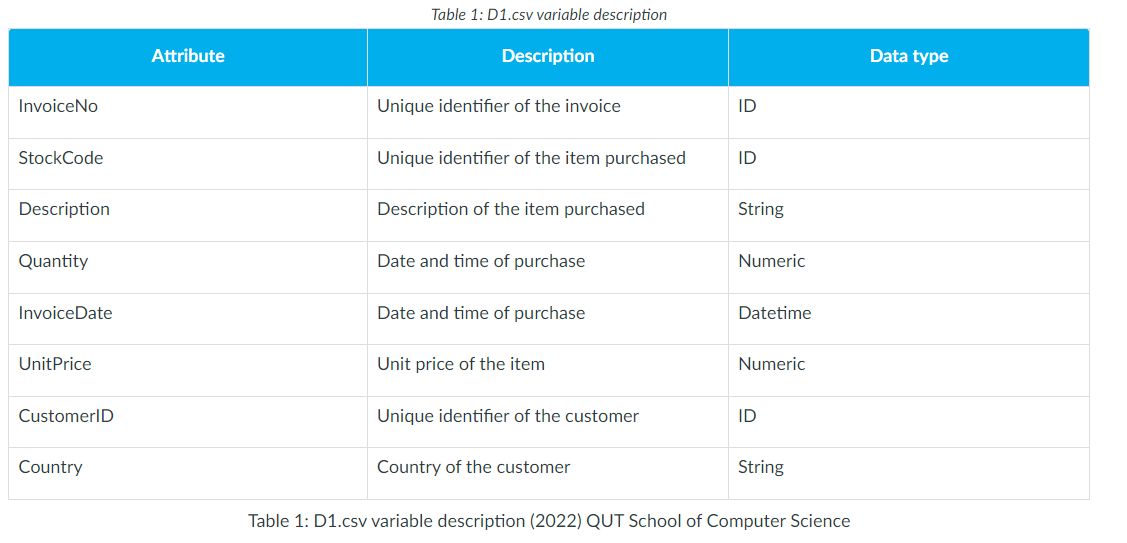

Consider each invoice as a transaction in the dataset ‘D1.csv’ and build an association mining model on this dataset to identify what are the common items that customers have purchased. The task is to conduct Association mining on this data set.

Answer the following questions concerning this data and analysis.

1. What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice.

Conduct association mining and answer the following:
    
    2. What ‘min_support’ and 'min_confidence' thresholds were set for this mining exercise? What is the rationale for why these values were chosen?
    3. Report the top-5 rules and interpret them.

4. Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.
5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.
6. How can the outcome of this study be used by the relevant decision-makers?

## What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice

In [ ]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import numpy as np

# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# load the bank transaction dataset
df = pd.read_csv('D1.csv')

# Data info
print(df.info())

In [ ]:
# Convert the 'DateColumn' to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert Customer ID to object
df['CustomerID'] = df['CustomerID'].astype(object)

# info
print(df.info())

In [ ]:
nan_counts = df.isna().sum()/19663

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Proportion')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df['Description'].fillna("MISSING", inplace=True)

# Group by StockCode and collect unique descriptions along with their counts
stock_code_counts = df.groupby('StockCode')['Description'].agg(['unique', 'count'])

# Sort the DataFrame by the 'count' column in descending order
stock_code_counts = stock_code_counts.sort_values(by='count', ascending=False)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full output with unique descriptions and their counts, sorted by count
print(stock_code_counts)


Vast majority of StockCodes are missing a Description, hence it makes sense to drop Description from the data frame

### Pre-processing required on the dataset before building the association mining model
1. **Inconsistent Data.**. The 'StockCode' variable currently has '85123A' and '85123a'. '85123a' needs to be replaced with '85123A' for consistency
2. **Missing Data**. 'Description' is missing 3% of it's data, and 'CustomerID' is missing 20%. 'StockCode' will be used instead of 'Description' and 'CustomerID' is redunant so will be removed.

In [ ]:
# Original Data
df = pd.read_csv('D1.csv')

In [ ]:
# Inconsistent Data
df['StockCode'] = df['StockCode'].replace('85123a', '85123A')


In [ ]:
# Redundant Data
df = df.drop(['Description'], axis=1)
df = df.drop(['CustomerID'], axis=1)

In [ ]:
print(df.info())

The only variables that will be used for association mining will be 'Invoice Number' and 'StockCode'. 
This is becasue "StockCode" is unique for each purchased product and "InvoiceNo" is unique for each purchase. Using this two variables, we can find associated products

## Conduct association mining and answer the following:

In [ ]:
# group by CustomerID, then list all StockCodes
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)

print(transactions)

## What ‘min_support’ and `min_confidence’ thresholds were set for this mining exercise? What is the rationale for why these values were chosen?

In [ ]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.02, confidence=0.5))

# print first 5 rules
print(results[:5])

In [ ]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

In [ ]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(5))

## Report the top-5 rules and interpret them.

**Rule 1: Jumbo Bag Red Retrospot, Lunch Bag Black Skull => Lunch Bag Red Retrospot**
- There is a 2.3% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Black Skull and Lunch Bag Red Retrospot are bought togethor. 
- There is a 62.5% chance that if the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor, the Lunch Bag Red Retrospot will be bought.
- A customer purchasing a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull is 4.1 times as likely to also purchase a Lunch Bag Red Retrospot than a customer chosen at random.


**Rule 2: Lunch Bag Red Retrospot => Jumbo Bag Red Retrospot, Lunch Bag Black Skull**
- There is a 2.3% chance that the items Lunch Bag Red Retropot, Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor. 
- There is a 15.0% chance that if the item Lunch Bag Red Retrospot is bought, the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot is 4.1 times as likely to also purchase a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull than a customer chosen at random.


**Rule 3: Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot => Jumbo Bag Red Retrospot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot and Jumbo Bag Red Retrospot are bought togethor. 
- There is a 77.1% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought, the item Jumbo Bag Red Retrospot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot is 3.7 times as likely to also purchase a Jumbo Bag Red Retrospot than a customer chosen at random.


**Rule 4: Jumbo Bag Red Retrospot => Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the item Jumbo Bag Red Retrospot is bought, the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Jumbo Bag Red Retrospot is 3.7 times as likely to also purchase a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot than a customer chosen at random.

**Rule 5: Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot => Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Red Retrospot are bought, the item Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Red Retrospot is 3.6 times as likely to also purchase a Jumbo Bag Pink Polkadot than a customer chosen at random.

## Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.

In [ ]:
value = '20725'
filtered_df = result_df[result_df['Left_side'] == value]
print(filtered_df.info())

In [ ]:
filtered_df = filtered_df.sort_values(by='Lift', ascending=False)
print(filtered_df.head(5))

### Top 5 Associations
1. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot, Lunch Bag Black Skull
2. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot
3. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot, Lunch Bag Black Skull
4. LUNCH BAG RED RETROSPOT => Lunch Bag Black Skull
5. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot

**Sequential Mining**

## Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.

In [ ]:
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences)

In [ ]:
# Open the file in write mode ('w')
with open('seq_rule_output2.txt', 'w') as f:
    # Nothing needs to be written for it to be empty
    pass

In [ ]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf (1).jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [ ]:
get_association_rules(sequences, 0.1, 0.1)

# Project B — Descriptive mining scenario and dataset

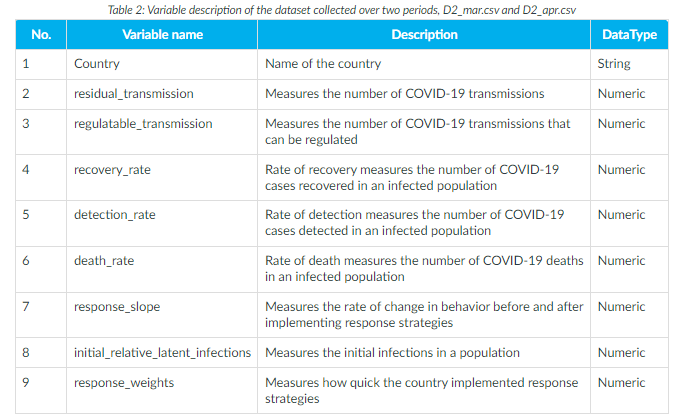

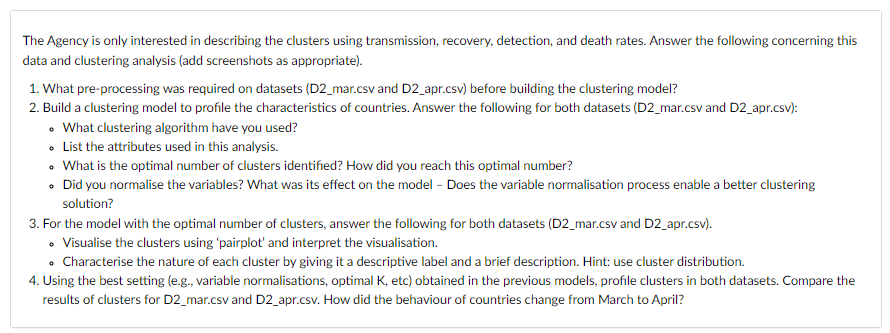

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# load the bank transaction dataset
D2_mar = pd.read_csv('D2_mar.csv')

# info and the first 10 transactions
print(D2_mar.info())

In [ ]:
unique_countries = D2_mar['Country'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

In [ ]:
#Create a new DataFrame with numeric variables
numeric_df = D2_mar.select_dtypes(include=['int', 'float'])


summary_df = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Mode', 'Skew'])

# Loop through the columns in the original DataFrame
for column in numeric_df.columns:
    # Calculate the mean, median, mode, and skewness for each variable
    mean_value = numeric_df[column].mean()
    median_value = numeric_df[column].median()
    mode_value = numeric_df[column].mode().iloc[0]

    
    # Determine the skewness category
    skew_category = ''
    if mode_value <= median_value <= mean_value:
        skew_category = 'Positive Skew'
    elif mean_value <= median_value <= mode_value:
        skew_category = 'Negative Skew'
    
    # Append the variable name, mean, median, mode, and skewness to the summary DataFrame
    summary_df = summary_df.append({'Variable': column, 'Mean': mean_value, 'Median': median_value, 'Mode': mode_value, 
                                    'Skew': skew_category}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iteratively generate histograms for each variable using sns.distplot
for column in numeric_df.columns:
    sns.distplot(numeric_df[column], bins=10, kde=False, rug=False)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
correlation_matrix = D2_mar.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- Several variables are skewed. For cluster analysis, variables are normalized anyway, so no need to transform
- No colinearity present between variables

In [ ]:
import pandas as pd

# load the bank transaction dataset
D2_apr = pd.read_csv('D2_apr.csv')

# info and the first 10 transactions
print(D2_apr.info())

In [ ]:
unique_countries = D2_apr['Country'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

In [ ]:
#Create a new DataFrame with numeric variables
numeric_df = D2_apr.select_dtypes(include=['int', 'float'])


summary_df = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Mode', 'Skew'])

# Loop through the columns in the original DataFrame
for column in numeric_df.columns:
    # Calculate the mean, median, mode, and skewness for each variable
    mean_value = numeric_df[column].mean()
    median_value = numeric_df[column].median()
    mode_value = numeric_df[column].mode().iloc[0]

    
    # Determine the skewness category
    skew_category = ''
    if mode_value <= median_value <= mean_value:
        skew_category = 'Positive Skew'
    elif mean_value <= median_value <= mode_value:
        skew_category = 'Negative Skew'
    
    # Append the variable name, mean, median, mode, and skewness to the summary DataFrame
    summary_df = summary_df.append({'Variable': column, 'Mean': mean_value, 'Median': median_value, 'Mode': mode_value, 
                                    'Skew': skew_category}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iteratively generate histograms for each variable using sns.distplot
for column in numeric_df.columns:
    sns.distplot(numeric_df[column], bins=10, kde=False, rug=False)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
correlation_matrix = D2_apr.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- Several variables are skewed. For cluster analysis, variables are normalized anyway, so no need to transform
- No colinearity present between variables

In [ ]:
Countries = pd.concat([D2_mar['Country'], D2_apr['Country']], axis=0, ignore_index=True)
Countries = pd.DataFrame({'Combined Countries': Countries})
Countries.info()


unique_countries = Countries['Combined Countries'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

In [ ]:
# Use factorize to map each unique value to a number
mapping, labels = pd.factorize(sorted_countries,sort = True)

In [ ]:
# Create a dictionary to map country names to numbers (adding 1 to each label value)
country_mapping = dict(zip(labels, [num + 1 for num in mapping]))

D2_mar['Country'] = D2_mar['Country'].replace(country_mapping)
D2_apr['Country'] = D2_apr['Country'].replace(country_mapping)

In [ ]:
D2_apr.info()

In [ ]:
from sklearn.preprocessing import StandardScaler

# convert df to matrix
X_mar = D2_mar.to_numpy()
X_apr = D2_apr.to_numpy()

# scaling
scaler = StandardScaler()
X_mar = scaler.fit_transform(X_mar)
X_apr = scaler.fit_transform(X_apr)

In [ ]:
X_apr

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

**D2_mar**

In [ ]:
# Set a specific seed for reproducibility
rs = 42

In [ ]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_mar, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

In [ ]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

**D2_apr**

In [ ]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_apr, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

In [ ]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

By applying the elbow method on the above plot, the optimal value for $K$ lies between 4 and 6. The silhouette score has to be calculated to find the optimal value.

Due to the presences of mixed data types (numeric and categorical), the calculation of silhouette score for `Kprototypes` is different form `KMeans`. For `Kprototypes`, two silhouette scores representing numeric variables and categorical variables should be calculated seperately and average should be calculated. We will first see how to calculate this value for $K = 4$.

In [ ]:
X_mar_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_mar] # Variables of X with numeric datatype
X_apr_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_apr] # Variables of X with numeric datatype

X_mar_cat = [[row[8]] for row in X_mar] # variables of X with categorical datatype
X_apr_cat = [[row[8]] for row in X_apr] # variables of X with categorical datatype

**D2_mar**

In [ ]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

**D2_apr**

In [ ]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

So for **D2_mar** k = 10 is the best option

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[4]
y = model.fit_predict(X_mar, categorical = [1])
D2_mar['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_mar['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_mar, hue='Cluster_ID', diag_kind='hist')
plt.show()

So for **D2_apr** k = 8 is the best option

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[3]
y = model.fit_predict(X_apr, categorical = [1])
D2_apr['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_apr['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_apr, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_mar.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(10, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_mar[col]), max(D2_mar[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_mar[D2_mar['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_mar[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_apr.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(8, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_apr[col]), max(D2_apr[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_apr[D2_apr['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_apr[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


In [ ]:
D2_mar

In [ ]:
Country = ['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
                'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Bolivia', 'Brazil', 'Brunei', 'Canada', 'Switzerland',
                'Chile', 'China', 'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
                'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
                'Ghana', 'Guinea', 'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel',
                'Italy', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait', 'Lebanon', 'Sri Lanka', 'Lithuania',
                'Luxembourg', 'Latvia', 'Morocco', 'Moldova', 'Madagascar', 'Mexico', 'North Macedonia', 'Mali', 'Malta', 'Montenegro', 'Mauritius', 'Malaysia',
                'Niger', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Paraguay',
                'Palestine', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'El Salvador', 'Serbia', 'Slovakia', 'Slovenia',
                'Sweden', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam',
                'South Africa']

In [ ]:
Abbreviation = ['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE',
                     'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
                     'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
                     'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD',
                     'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK',
                     'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'ZAF']
# Corresponding continents
continents = ['Asia',
'Europe',
'Europe',
'Asia',
'South America',
'Asia',
'Oceania',
'Europe',
'Asia',
'Europe',
'Africa',
'Asia',
'Europe',
'Asia',
'Europe',
'South America',
'South America',
'Asia',
'North America',
'Europe',
'South America',
'Asia',
'Africa',
'Africa',
'Africa',
'South America',
'Central America',
'Central America',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Central America',
'Africa',
'South America',
'Africa',
'Europe',
'Europe',
'Europe',
'Europe',
'Europe',
'Africa',
'Africa',
'Europe',
'Central America',
'Central America',
'Europe',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Europe',
'Asia',
'Asia',
'Asia',
'Africa',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Africa',
'North America',
'Europe',
'Africa',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Africa',
'Europe',
'Europe',
'Oceania',
'Asia',
'Asia',
'Central America',
'South America',
'Asia',
'Europe',
'Europe',
'South America',
'Asia',
'Asia',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Asia',
'Central America',
'Europe',
'Europe',
'Europe',
'Europe',
'Asia',
'Central America',
'Africa',
'Europe/Asia (Transcontinental)',
'Asia',
'Europe',
'South America',
'North America',
'Asia',
'South America',
'Asia',
'Africa']


In [ ]:
mapping

In [ ]:
labels

In [ ]:
len(Country)

In [ ]:
len(continents)

In [ ]:
# Create pandas Series from the lists
numbers_series = pd.Series(mapping, name='Country')
countries_series = pd.Series(Country, name='Name')
continents_series = pd.Series(continents, name='continents')

# Create DataFrames from the Series
database = pd.DataFrame(numbers_series, columns=['Country'])
country_continent_data = pd.DataFrame({'Country': numbers_series, 'Name': countries_series, 'continents': continents_series})

# Merge the two DataFrames based on the 'Number' column
merged_data = pd.merge(database, country_continent_data, on='Country')



In [ ]:
merged_data.info()

In [ ]:
D2_mar.info()

In [ ]:
# Merge the dataframes based on 'Country' column
merged_df2 = pd.merge(D2_mar, merged_data[['Country', 'Name', 'continents']], on='Country', how='left')

# Rename the columns to match your requirement
merged_df2.rename(columns={'Name': 'Country Name', 'continents': 'Continent'}, inplace=True)

In [ ]:
merged_df2

In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_sorted = merged_df2.sort_values(by='Cluster_ID')
df_sorted

# Assignment 2: Project C — Predictive mining

**1. What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for regression modelling? What distribution split between training and test datasets have you used?**


In [1]:
# insert this code in a file dm_tools.py so that you don't have to write this everytime you build a new model.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('D3.csv')
    
# Drop variables
df = df.drop(['Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'Year'], axis=1)
    
# Change Pressure and Temp variables to averages
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm'])/2
df = df.drop(['Pressure9am', 'Pressure3pm'], axis=1)
df['Temp'] = (df['MinTemp'] + df['MaxTemp'])/2
df = df.drop(['MinTemp', 'MaxTemp'], axis=1)
              
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df)
print(df.info())

# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

# setting random state
rs = 10

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Columns: 109 entries, Month to WindDir3pm_WSW
dtypes: float64(7), int64(5), uint8(97)
memory usage: 26.2 MB
None


**2. Build a decision tree using the default setting.**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

**2(a) What is the classification accuracy of training and test datasets?**

In [3]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


In [4]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.7896920264379131


It seems like this maximal tree overfits on the training dataset. Therefore, we need to tune the hyperparameters of the model and ensure it can generalise better to the test set to find an optimal tree.

In [5]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33101
           1       0.53      0.54      0.54      9565

    accuracy                           0.79     42666
   macro avg       0.70      0.70      0.70     42666
weighted avg       0.79      0.79      0.79     42666



**2(b) What is the size of the tree (number of nodes and rules)?**

In [6]:
# Assuming model is the trained DecisionTreeClassifier
tree = model.tree_

# Number of nodes
num_nodes = tree.node_count
print("Number of nodes:", num_nodes)

# Number of rules (number of leaves)
num_rules = tree.n_leaves
print("Number of rules (leaves):", num_rules)

Number of nodes: 24485
Number of rules (leaves): 12243


**2(c) Which variable is used for the first split?**

In [7]:
first_split_variable = model.tree_.feature[0]
print("Variable used for the first split:", X.columns[first_split_variable])

Variable used for the first split: Humidity3pm


**2(d) What are the five important variables in building the tree?**

In [8]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])

Humidity3pm : 0.26132657865677433
Pressure : 0.07591182617007108
Temp : 0.06895866715286508
Rainfall : 0.06330962076075361
WindGustSpeed : 0.06304829749754523


**2(e) What parameters have been used in building the tree? Detail them.**

In [9]:
# Parameters used in building the tree
tree_params = model.get_params()
print("Parameters used in building the tree:")
for key, value in tree_params.items():
    print(f"{key}: {value}")

Parameters used in building the tree:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 10
splitter: best


**3. Build another decision tree tuned with GridSearchCV**

In [10]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

In [19]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}


**3(a) What is the classification accuracy of training and test datasets?**

In [ ]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

**3(b) What is the size of the tree (i.e. number of nodes and rules)?**

In [28]:
# Assuming cv_1.best_estimator_ is the trained DecisionTreeClassifier
tree = cv_1.best_estimator_.tree_

# Number of nodes
num_nodes = tree.node_count
print("Number of nodes:", num_nodes)

# Number of rules (number of leaves)
num_rules = tree.n_leaves
print("Number of rules (leaves):", num_rules)

Number of nodes: 479
Number of rules (leaves): 240


**3(c) Which variable is used for the first split?**

In [32]:
# Assuming cv_1.best_estimator_ is the trained DecisionTreeClassifier
tree = cv_1.best_estimator_.tree_

# Get the feature index used for the first split
first_split_feature_index = tree.feature[0]

# Print the variable used for the first split
print("Variable used for the first split:", X.columns[first_split_feature_index])

Variable used for the first split: Humidity3pm


**3(d) What are the five important variables in building the tree?**

In [33]:
analyse_feature_importance(cv_1.best_estimator_, X.columns, 5)

Humidity3pm : 0.6202150966882807
Norm_Rainfall : 0.10093405700082608
WindGustSpeed : 0.07771692089219248
Pressure : 0.0691379831238478
Sunshine : 0.06484505193563588


**3(e) Report if you see any evidence of model overfitting.**

In [15]:
result_set = cv_1.cv_results_

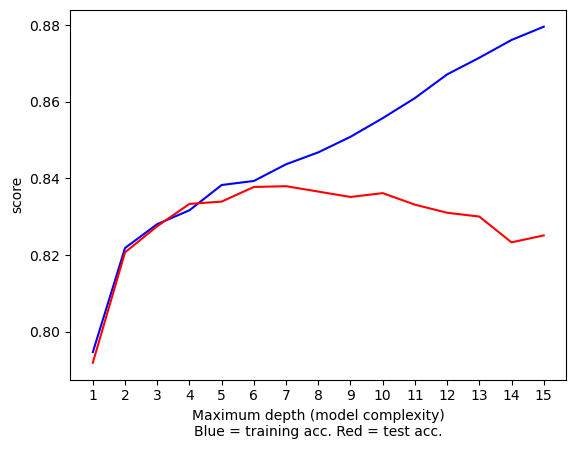

In [17]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

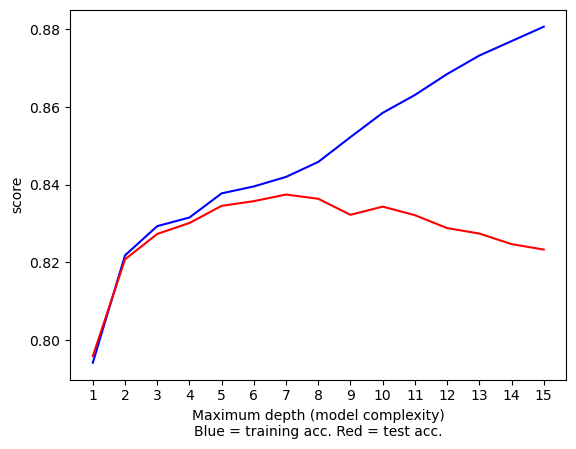

In [18]:
### Enter your code here for split1
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

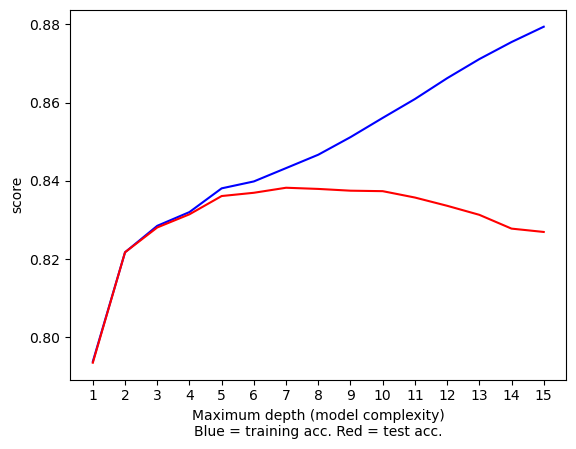

In [20]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

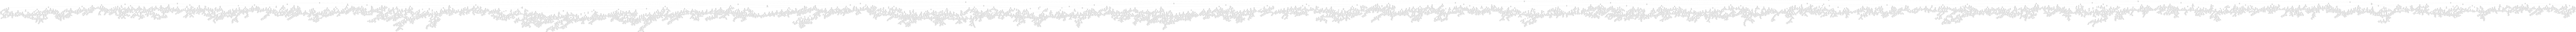

In [22]:
# inside `dm_tools.py' together with data_prep()
from sklearn.tree import export_graphviz
import pydotplus
from io import BytesIO
from PIL import Image

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dot_data = export_graphviz(dm_model, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    
    if graph:
        # Convert dot object to a PNG image
        image = Image.open(BytesIO(graph.create_png()))
        image.save(save_name)
    else:
        print("Error: Empty graph.")



In [23]:
from dm_tools import analyse_feature_importance, visualize_decision_tree

visualize_decision_tree(cv_1.best_estimator_, X.columns, "optimal_tree.png")

Humidity3pm : 0.6202150966882807
Norm_Rainfall : 0.10093405700082608
WindGustSpeed : 0.07771692089219248
Pressure : 0.0691379831238478
Sunshine : 0.06484505193563588
Temp : 0.017779224181409526
Humidity9am : 0.010344060569718714
WindSpeed3pm : 0.005566886167895432
Location_MountGinini : 0.0036872787879863936
WindSpeed9am : 0.002542649725317199
Norm_Evaporation : 0.0024899759028171654
WindDir3pm_NNW : 0.002171073783299154
Location_Albany : 0.002147664117912054
Location_Wollongong : 0.0020051992082549316
Year : 0.0016797775764980554
WindDir3pm_N : 0.0016356201313230255
WindGustDir_NE : 0.001586596100491913
Location_Brisbane : 0.0015073428454028205
WindDir9am_NNE : 0.0012148800771104062
Location_NorahHead : 0.001128096595247691
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.821187 to fit

(process:22212): GLib-GIO-WARNING **: 21:15:00.926: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') sup

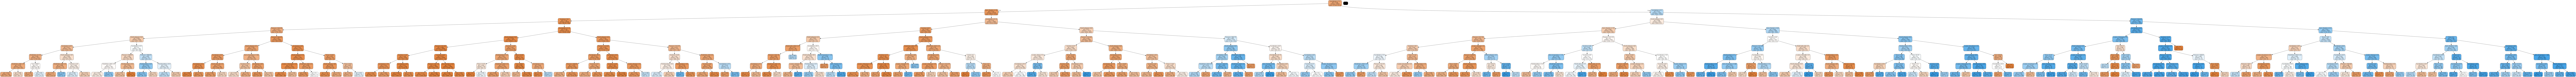

Total number of models:  120


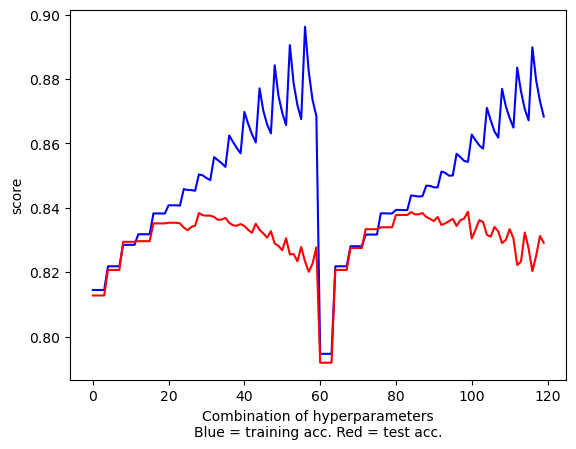

In [16]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

In [5]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_viz.png")  # Note the change here


(process:26592): GLib-GIO-WARNING **: 20:26:54.042: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:26592): GLib-GIO-WARNING **: 20:26:54.100: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.067726 to fit



True

In [34]:
?????

NameError: name 'X_val' is not defined

In [24]:
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = cv_1.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.7915904936014625
Accuracy score on test for DT_optimal 0.840927201987531


Based on test accuracy score, the decision tree with grid search (optimal tree) performs the best.

**4. What is the difference you see between these two decision tree models (refer to the size of the trees—number of nodes and rules)? How do they compare performance-wise? Produce the ROC curve for both DTs. Explain why those changes may have happened.**

| Model | Train accuracy | Test Accuracy | Number of Nodes | Number of Rules |
| --- | --- | --- | --- | --- |
| Default Setting | 100 | 79.16 | 24127 | 12064 |
| Tuned with GridSearchCV | 84.89 | 84.09 | 479 | 240 |

In [40]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.7648490749756572 	 0.23515092502434273 	 1
0.745814307458143 	 0.2541856925418569 	 0
0.10303030303030303 	 0.896969696969697 	 0
0.9161585365853658 	 0.08384146341463415 	 0
0.8037267080745342 	 0.19627329192546583 	 0
0.6219931271477663 	 0.37800687285223367 	 0
0.9871218927822701 	 0.01287810721772986 	 0
0.9113253012048192 	 0.08867469879518072 	 0
0.8733173520191776 	 0.12668264798082243 	 0
0.8246135552913199 	 0.17538644470868014 	 0
0.9871218927822701 	 0.01287810721772986 	 0
0.9871218927822701 	 0.01287810721772986 	 0
0.8733173520191776 	 0.12668264798082243 	 0
0.8733173520191776 	 0.12668264798082243 	 0
0.9161585365853658 	 0.08384146341463415 	 0
0.745814307458143 	 0.2541856925418569 	 0
0.9374773337201712 	 0.06252266627982882 	 0
0.9805530776092775 	 0

In [41]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.7041117751206831
ROC index on test for DT_optimal: 0.8494655785324495


In [42]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

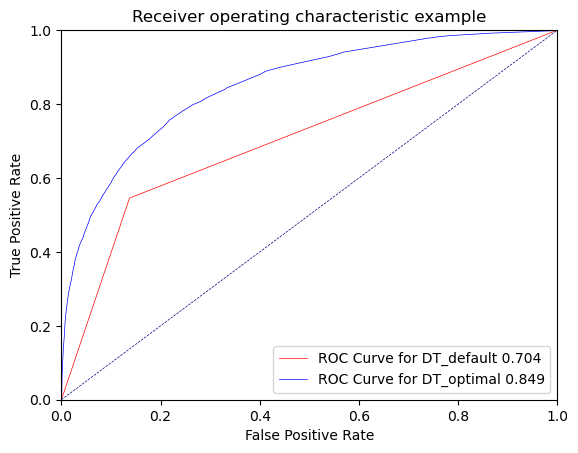

In [43]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The DT with GridSearchCV (DT_CV) shows the largest curve area compared to the DT with default settings (DT). Thus DT_CV is the best performing model.

**5. From the better model, can you provide general characteristics that infer the model to predict rain tomorrow?**

In [45]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

In [46]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

Humidity3pm : 0.6202150966882807
Norm_Rainfall : 0.10093405700082608
WindGustSpeed : 0.07771692089219248
Pressure : 0.0691379831238478
Sunshine : 0.06484505193563588
Temp : 0.017779224181409526
Humidity9am : 0.010344060569718714
WindSpeed3pm : 0.005566886167895432
Location_MountGinini : 0.0036872787879863936
WindSpeed9am : 0.002542649725317199
Norm_Evaporation : 0.0024899759028171654
WindDir3pm_NNW : 0.002171073783299154
Location_Albany : 0.002147664117912054
Location_Wollongong : 0.0020051992082549316
Year : 0.0016797775764980554
WindDir3pm_N : 0.0016356201313230255
WindGustDir_NE : 0.001586596100491913
Location_Brisbane : 0.0015073428454028205
WindDir9am_NNE : 0.0012148800771104062
Location_NorahHead : 0.001128096595247691


# Assignment 2: Project C — Making a regression model

1. What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for regression modelling? What distribution split between training and test datasets have you used?

2. Build a regression model using the default regression method with all inputs. Build another regression model tuned with GridSearchCV. Now, choose a better model to respond to the following:

- Why you chose that model.
- Name the regression function used.
- Did you apply standardization of variables? Why would you normalise the variables for regression mining?
- Report the variables included in the regression model.
- Report the top-5 important variables (in order) in the model.
- What is the classification accuracy on training and test datasets?
- Report any sign of overfitting in this model.

3. Build another regression model on the reduced variables set. Perform dimensionality reduction with recursive feature elimination. Tune the model with GridSearchCV to find the best parameter setting. Answer the followings:

- Was dimensionality reduction useful to identify a good feature set for building the accurate model?
- What is the classification accuracy on training and test datasets?
- Report any sign of overfitting.
- Report the top-3 important variables (in order) in the model.
- Produce the ROC curve for all different regression models. Using the best regression model, can you provide general characteristics that infer the model to predict rain tomorrow?

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep

In [11]:
# insert this code in a file dm_tools.py so that you don't have to write this everytime you build a new model.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def data_prep():
    # read the dataset
    df = pd.read_csv('D3.csv')
    
    # Drop variables
    df = df.drop(['Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm'], axis=1)
    
    # Change Pressure and Temp variables to averages
    df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm'])/2
    df = df.drop(['Pressure9am', 'Pressure3pm'], axis=1)

    df['Temp'] = (df['MinTemp'] + df['MaxTemp'])/2
    df = df.drop(['MinTemp', 'MaxTemp'], axis=1)
    
    # Using Z-Score Normalisation

    # Calculate Means
    mean_Rainfall = df['Rainfall'].mean()
    mean_Evaporation = df['Evaporation'].mean()

    # Calculate Standard Deviations
    std_Rainfall = df['Rainfall'].std()
    std_Evaporation = df['Evaporation'].std()

    # Apply Transformations
    df['Norm_Rainfall'] = (df['Rainfall']-mean_Rainfall)/std_Rainfall
    df['Norm_Evaporation'] = (df['Evaporation']-mean_Evaporation)/std_Evaporation

    # Drop original variables from Data frame
    df = df.drop(['Rainfall', 'Evaporation'], axis=1)
    
    # one-hot encoding
    df = pd.get_dummies(df)
         
    # target/input split
    y = df['RainTomorrow']
    X = df.drop(['RainTomorrow'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test


In [12]:
from dm_tools2 import data_prep 
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Columns: 110 entries, Year to WindDir3pm_WSW
dtypes: float64(7), int64(6), uint8(97)
memory usage: 27.3 MB


**Standardisation** 

Show the resulsts of standardisation for the first 10 varibales. Do I need to show more/less? Why does the module show any?

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialise a StandardScaler object
scaler = StandardScaler()

# Visualize min, max, mean, and standard deviation of data before scaling
print("Before scaling\n-------------")
for i in range(10):
    col = X_train[:, i]
    # Display statistics for each variable (column) in X_train
    print("Variable #{}: min {}, max {}, mean {:.2f}, and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# Learn the mean and std.dev of variables from the training data
# Then use the learned values to transform the training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(10):
    col = X_train[:, i]
    # Display statistics for each variable after scaling
    print("Variable #{}: min {}, max {}, mean {:.2f}, and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# Use the statistics learned from training to transform the test data
# NEVER learn from test data; this is supposed to be a set of data
# that the model has never seen before
X_test = scaler.transform(X_test)


Before scaling
-------------
Variable #0: min 2007.0, max 2017.0, mean 2012.75, and std dev 2.54
Variable #1: min 1.0, max 12.0, mean 6.40, and std dev 3.43
Variable #2: min 0.0, max 14.5, mean 7.61, and std dev 2.74
Variable #3: min 7.0, max 135.0, mean 40.02, and std dev 13.15
Variable #4: min 0.0, max 130.0, mean 14.02, and std dev 8.88
Variable #5: min 0.0, max 83.0, mean 18.66, and std dev 8.73
Variable #6: min 0.0, max 100.0, mean 68.84, and std dev 18.88
Variable #7: min 0.0, max 100.0, mean 51.49, and std dev 20.50
Variable #8: min 981.05, max 1040.05, mean 1016.44, and std dev 6.65
Variable #9: min -6.15, max 38.8, mean 17.72, and std dev 6.28
After scaling
-------------
Variable #0: min -2.263858132625288, max 1.6705492056550804, mean 0.00, and std dev 1.00
Variable #1: min -1.5743209315248312, max 1.631729774781424, mean -0.00, and std dev 1.00
Variable #2: min -2.7777448831061067, max 2.517232055162849, mean 0.00, and std dev 1.00
Variable #3: min -2.51164382853385, max 7.2

**Training logistic regression**

Once the input variables are scaled, we are ready to build the model. As discussed before, the underlying problem is classification predictive mining, therefore, a logistic regression model will be build for this classification task. In sklearn, logistic regression is implemented in

In [14]:
from sklearn.linear_model import LogisticRegression

Similar to decision tree, initiate a model object (with random state to ensure consistent result) and fit it to the training dataset.

In [15]:
rs = 10

model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [17]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8451879903167158
Test accuracy: 0.8451225800403132
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     33101
           1       0.73      0.49      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.83     42666



We will tune this logistic regression model later using GridSearchCV to imrprove the accuracy.

We can print out the feature name associated with each coefficient 

In [18]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

Year : 0.046775551088708886
Month : 0.05168570991241901
Sunshine : -0.41832453694916233
WindGustSpeed : 0.7122464582758535
WindSpeed9am : -0.027921586658590812
WindSpeed3pm : -0.1797293038183642
Humidity9am : 0.14582010421894062
Humidity3pm : 1.2569171444033111
Pressure : -0.4036819708908901
Temp : 0.08138756899788642
Norm_Rainfall : 0.15977535449719837
Norm_Evaporation : -0.013312972483027865
Location_Adelaide : 0.10529811377492375
Location_Albany : -0.0006797555378787364
Location_AliceSprings : 0.042612039662635916
Location_Archerfield : 0.0766838947522498
Location_BadgerysCreek : 0.026718819603056238
Location_Ballarat : -0.05085340889687859
Location_Bendigo : 0.02553506909389653
Location_Brisbane : 0.07969168214639477


Positive coefficient means positive change in the input feature has positive correlation to the prediction value. 
Negative coefficient does the reverse. 
In addition to understanding positive/negative correlations between features and prediction values, it is important to learn how much a feature impacts the overall prediction value (i.e. feature importance). One way to answer this question is by looking at the absolute value of coefficients. Changes in an important variable (either positive or negative) should correlate to a larger impact to prediction value, thus the coefficient assigned to this variable will have a large absolute value.

This method only applies when the features are standard scaled. Without scaling, each feature can be on different range of values, making the larger ranged feature more important by default. 

The following code will sort the coefficients by their largest absolute value and print the corresponding feature names.

In [25]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)


for i in indices:
    print(feature_names[i], ':', coef[i])

Humidity3pm : 1.2569171444033111
WindGustSpeed : 0.7122464582758535
Sunshine : -0.41832453694916233
Pressure : -0.4036819708908901
WindSpeed3pm : -0.1797293038183642
Norm_Rainfall : 0.15977535449719837
Location_MountGinini : -0.14625475579867928
Humidity9am : 0.14582010421894062
Location_Wollongong : -0.11511894135891175
Location_Hobart : -0.11265232782099283
Location_Adelaide : 0.10529811377492375
WindDir3pm_NNW : 0.10218970407121584
WindDir3pm_NW : 0.09598801237713828
Location_Perth : 0.0847534702540737
WindDir3pm_SW : -0.08435707926696598
Temp : 0.08138756899788642
Location_Brisbane : 0.07969168214639477
Location_MelbourneAirport : -0.07957525875526092
WindDir3pm_N : 0.07837253974680798
Location_NorahHead : -0.07813137430377545
Location_Witchcliffe : 0.07685574030908887
Location_Archerfield : 0.0766838947522498
Location_Townsville : -0.07570762742662243
WindDir9am_NNE : 0.06603021391171474
Location_Penrith : 0.06583174376285059
Location_Cobar : 0.06428528481683705
Location_PerthAirp

Based on this output, the top-3 important variables in this model are;
1. Humidity3pm
2. WindGustSpeed
3. Sunshine

**Finding optimal hyperparameters with GridSearchCV**

In [19]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=8, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [20]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([2.54223105, 2.17315799, 1.91791034, 2.98034558, 3.97549829,
       3.41020346, 4.11609814, 3.43411145, 4.05165955, 2.67640117]), 'std_fit_time': array([0.45217671, 0.29997297, 0.16648851, 0.36590748, 0.71305294,
       0.62294086, 0.52992732, 0.16244505, 0.50223412, 0.68691123]), 'mean_score_time': array([0.02879059, 0.02078965, 0.03364217, 0.03014269, 0.03953603,
       0.028584  , 0.03520727, 0.03263378, 0.03428015, 0.01826131]), 'std_score_time': array([0.00951575, 0.00690242, 0.02159934, 0.00587695, 0.02814503,
       0.01301547, 0.01644128, 0.009121  , 0.02441195, 0.00410999]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Let us plot the train and test score of split0.

Total number of models:  10


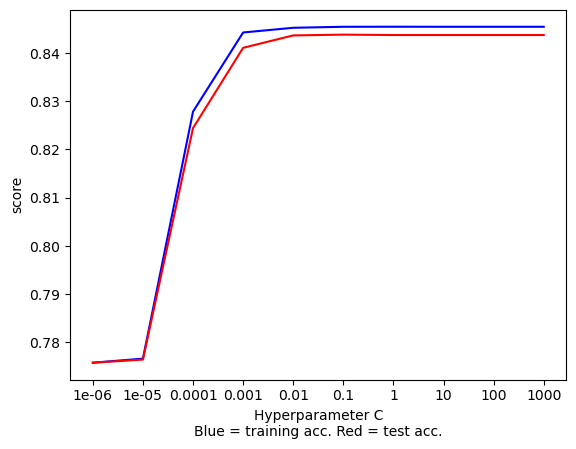

In [21]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Now, let us plot the mean train and test score for all the splits.

Total number of models:  10


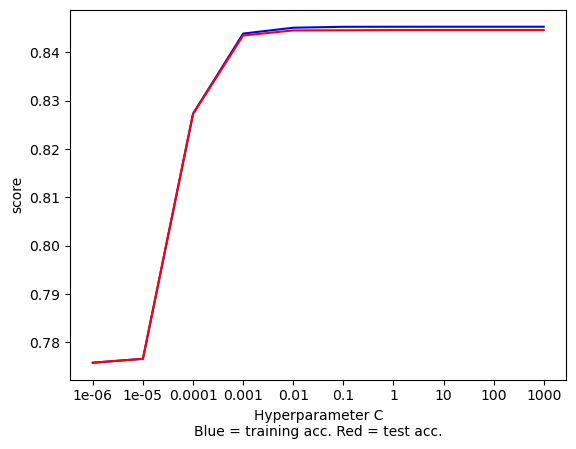

In [22]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [23]:
print(cv.best_params_)

{'C': 10}


In [24]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.8451779454160095
Test accuracy: 0.8451225800403132


In [33]:
# grab feature importances from the model and feature name from the original X
coef = cv.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)


for i in indices:
    print(feature_names[i], ':', coef[i])

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

**Feature selection using Recursive Feature Elimination**

In [25]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 109
Number of features after elimination 103


In [26]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

Let us run another GridSearchCV and test if the new input set can improve the model performance

In [27]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.8451377658131849
Test accuracy: 0.8451225800403132
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     33101
           1       0.73      0.49      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.83     42666

{'C': 1}


**Comparision and finding the best performing model**

In [28]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)



roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])


print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)


ROC index on test for `model`: 0.8670921497958386
ROC index on test for `cv`: 0.867091562324267
ROC index on test for `rfe_cv`: 0.8670901631312222


In [29]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

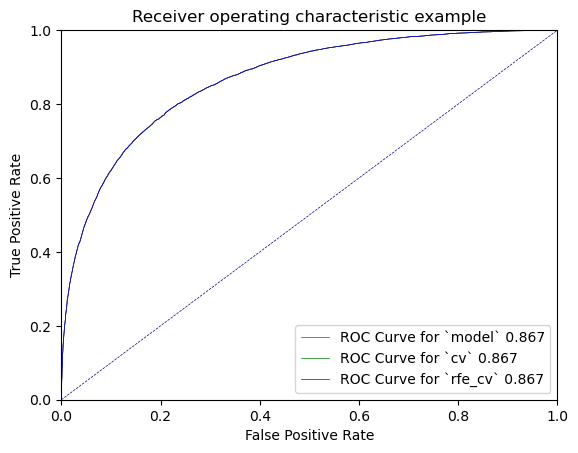

In [32]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Assignment 2: Project C — Making a Neural Network

1. What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for neural network modelling? What distribution split between training and test datasets have you used?
2. Build a Neural Network model using the default setting. Answer the following:
- Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
- What is the classification accuracy on training and test datasets?
- Did the training process converge and result in the best model?
3. Refine this network by tuning it with GridSearchCV. Report the trained model.
- Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
- What is the classification accuracy on training and test datasets?
- Did the training process converge and result in the best model?
- Do you see any sign of over-fitting?
4. Let us see if feature selection helps in improving the model? Build another Neural Network model with reduced features set. Perform dimensionality reduction by selecting variables with a decision tree (use the best decision tree model that you have built in the previous modelling task). Tune the model with GridSearchCV to find the best parameters setting. Answer the following:\
- Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?
- What is the classification accuracy on training and test datasets?
- How many iterations are now needed to train this network?
- Do you see any sign of over-fitting? Did the training process converge and result in the best model?


In [ ]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools2 import data_prep
from sklearn.preprocessing import StandardScaler

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

**Building the first neural network model**

In [7]:
# Import the MLPClassifier from scikit-learn
from sklearn.neural_network import MLPClassifier

# Assuming 'rs' is a predefined random state variable
# Create an instance of MLPClassifier with a specified maximum number of iterations
# (max_iter) and a random state
model_1 = MLPClassifier(max_iter=700, random_state=rs)

# Train the model using the training data (X_train, y_train)
model_1.fit(X_train, y_train)

# Print the accuracy of the model on the training data
print("Train accuracy:", model_1.score(X_train, y_train))

# Print the accuracy of the model on the testing data (unseen data)
print("Test accuracy:", model_1.score(X_test, y_test))

# Make predictions on the testing data
y_pred = model_1.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print information about the trained model, which typically includes
# hyperparameters and other details about the neural network
print(model_1)

Train accuracy: 0.9076974074111277
Test accuracy: 0.8334505226644167
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     33101
           1       0.64      0.58      0.61      9565

    accuracy                           0.83     42666
   macro avg       0.76      0.74      0.75     42666
weighted avg       0.83      0.83      0.83     42666

MLPClassifier(max_iter=700, random_state=10)


The neural network after setting the iteration of 700 performed with accuracy on the training dataset of 90.77%. However, the test accuracy is 83.35%. This clearly indicates overfitting to the training data. Next, we will use the GridSearch tuning and dimensionality reduction techniques to control the overfitting of the model to the training data.

We will use relu as the activation function

**Finding optimal hyperparameter with GridSearchCV**

In [ ]:
# Print the shape of the training data matrix X_train
print(X_train.shape)

With 109 features, we will start tuning with one hidden layer of 9 to 109 neurons, increment of 20

In [ ]:
# Define a dictionary of hyperparameter values to search through.
# In this case, it's the hidden layer sizes, where each value is a tuple
# containing a single integer representing the size of a hidden layer.
params = {'hidden_layer_sizes': [(x,) for x in range(9, 110, 20)]}

# Create an instance of GridSearchCV, which performs a search over a specified
# parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), return_train_score=True, cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_1.fit(X_train, y_train)


In [ ]:
# Access the results of the cross-validated hyperparameter search
result_set = cv_1.cv_results_

# Print the result set, which is a dictionary containing various information
# about the cross-validated search, including mean and standard deviation
# scores for each combination of hyperparameters, training time, etc.
print(result_set)


In [ ]:
# Access the mean training accuracy scores from the cross-validated search results
train_result = result_set['mean_train_score']

# Access the mean test accuracy scores from the cross-validated search results
test_result = result_set['mean_test_score']

# Print the total number of models (number of hyperparameter combinations)
print("Total number of models: ", len(test_result))

# Plot hidden layers hyperparameter values vs mean training and test accuracy scores
plt.plot(range(0, len(train_result)), train_result, 'b', range(0, len(test_result)), test_result, 'r')
# Label the x-axis with the hyperparameter values
plt.xticks(range(0, len(train_result)), range(9, 110, 20))
plt.xlabel('Hyperparameter Hidden_layers\nBlue = mean training acc. Red = mean test acc.')
plt.ylabel('Score')

# Display the plot
plt.show()


In [ ]:
# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_1.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_1.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_1.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_1.best_params_)

The output of this GridSearchCV returns 9 neurons as the optimal number of neurons in the hidden layer. We should attempt to tune the model with the lower number of neurons in the hidden layer.

In [ ]:
# Define a dictionary of new hyperparameter values to search through.
# In this case, it's different combinations of hidden layer sizes.
params = {'hidden_layer_sizes': [(6,), (9,),(12,), (15,), (18,), (21,), (24,), (27,)]}

# Create a new instance of GridSearchCV, which performs a search over
# the specified parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_2.fit(X_train, y_train)

# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_2.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_2.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_2.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_2.best_params_)


We now have the optimal value for neuron count in the hidden layer. Next, we will tune the second hyperparameter, alpha, which is the learning rate for the gradient descent algorithm.

In [ ]:
# Define a dictionary of hyperparameter values to search through.
# In this case, it includes different combinations of hidden layer sizes
# and values for the regularization parameter alpha.
params = {'hidden_layer_sizes': [(9,), (12,), (15,), (18,), (21,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

# Create a new instance of GridSearchCV, which performs a search over
# the specified parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_3.fit(X_train, y_train)

# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_3.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_3.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_3.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_3.best_params_)

The GridSearch returned a hidden layer of 21 neurons and alpha value of 0.01 as the optimal hyperparameters. It is marginally better than the previous models cv_1 and cv_2.

Next we will try to improve performance of the model through dimensionality reduction and transformation techniques

We will first try to reduce the feature set size using RFE. We will need a base elimination model and RFE requires the type of model that assigns weight/feature importance to each feature (like regression/decision tree). Unfortunately, neural networks provide neither, thus we will try to use Logistic Regression as the base elimination model.

In [ ]:
# Import the necessary libraries
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rs = 10

# Create an instance of RFECV with Logistic Regression as the base estimator
# 'estimator' is the model used as the base estimator (Logistic Regression in this case)
# 'cv' is the number of cross-validation folds
rfe = RFECV(estimator=LogisticRegression(random_state=rs), cv=10)

# Fit RFECV on the training data to select the optimal number of features
rfe.fit(X_train, y_train)

# Print the optimal number of features selected by RFECV
print(rfe.n_features_)